In [0]:
import imutils
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.transform import pyramid_gaussian

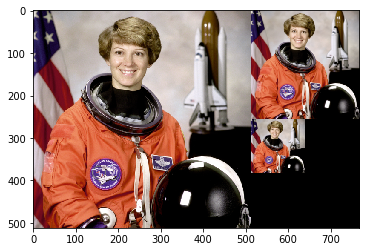

In [18]:
image = data.astronaut()
rows, cols, dim = image.shape
pyramid = tuple(pyramid_gaussian(image, downscale=2, multichannel=True)) #function to generate pyramid

composite_image = np.zeros((rows, cols + cols // 2, 3), dtype=np.double) #our canvas for the pyramid

composite_image[:rows, :cols, :] = pyramid[0] # the original image

i_row = 0
for p in pyramid[1:]: #in list of images formed from function pyramid_gaussian
    n_rows, n_cols = p.shape[:2] #rows and cols of image p in pyramid
    composite_image[i_row:i_row + n_rows, cols:cols + n_cols] = p  #filling our canvas with image p
    i_row += n_rows #for next image

fig, ax = plt.subplots()
ax.imshow(composite_image)
plt.show()

In [0]:
def pyramid(image, scale=1.5, minSize=(30, 30)): 
  rows, cols, dim = image.shape
  pyramid = tuple(pyramid_gaussian(image, downscale=2, multichannel=True)) #function to generate pyramid

  composite_image = np.zeros((rows, cols + cols // 2, 3), dtype=np.double) #our canvas for the pyramid

  composite_image[:rows, :cols, :] = pyramid[0] # the original image

  i_row = 0
  for p in pyramid[1:]: #in list of images formed from function pyramid_gaussian
      n_rows, n_cols = p.shape[:2] #rows and cols of image p in pyramid
      print("n_rows, n_cols =", n_rows, n_cols)
      if p.shape[:2] > minSize: 
        composite_image[i_row:i_row + n_rows, cols:cols + n_cols] = p  #filling our canvas with image p
        i_row += n_rows #for next image
      else :
        print("Image size is less than minimum size. Returning composite image")
        return composite_image


n_rows, n_cols = 256 256
n_rows, n_cols = 128 128
n_rows, n_cols = 64 64
n_rows, n_cols = 32 32
n_rows, n_cols = 16 16
Image size is less than minimum size. Returning composite image


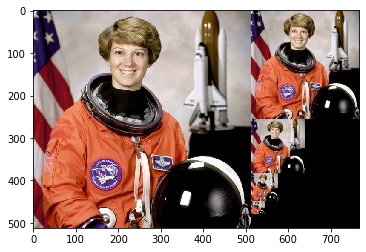

In [36]:
image = data.astronaut()
composite_image = pyramid(image, scale=2, minSize=(30, 30))
plt.imshow(composite_image)